#### Assignment : Ranveer Singh

In [84]:
import numpy as np
import pandas as pd
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [85]:
bike.shape #(730, 16)
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [86]:
bike.isnull().sum() # No null values
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [87]:
bikeColumnsMap={'cnt':'Count','yr':'Year','mnth':'Month','hum':'Humidity'}

In [88]:
bike.rename(columns = bikeColumnsMap, inplace = True) 
bike['Season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike['Month']=bike.Month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['Weather']=bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike['Weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bike.head()

,instant,dteday,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,casual,registered,Count,Season,Weather,Weekday
0,1,01-01-2018,1,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,spring,Mist + Cloudy,Sat
1,2,02-01-2018,1,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,spring,Mist + Cloudy,Sun
2,3,03-01-2018,1,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,spring,Clear,Mon
3,4,04-01-2018,1,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,spring,Clear,Tue
4,5,05-01-2018,1,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,spring,Clear,Wed


In [89]:
### Data Visualisation

In [90]:
#Check the unquiness and 
bike.nunique().sort_values()

Year            2
holiday         2
workingday      2
weathersit      3
Weather         3
Season          4
season          4
Weekday         7
weekday         7
Month          12
temp          498
Humidity      594
casual        605
windspeed     649
registered    678
atemp         689
Count         695
dteday        730
instant       730
dtype: int64

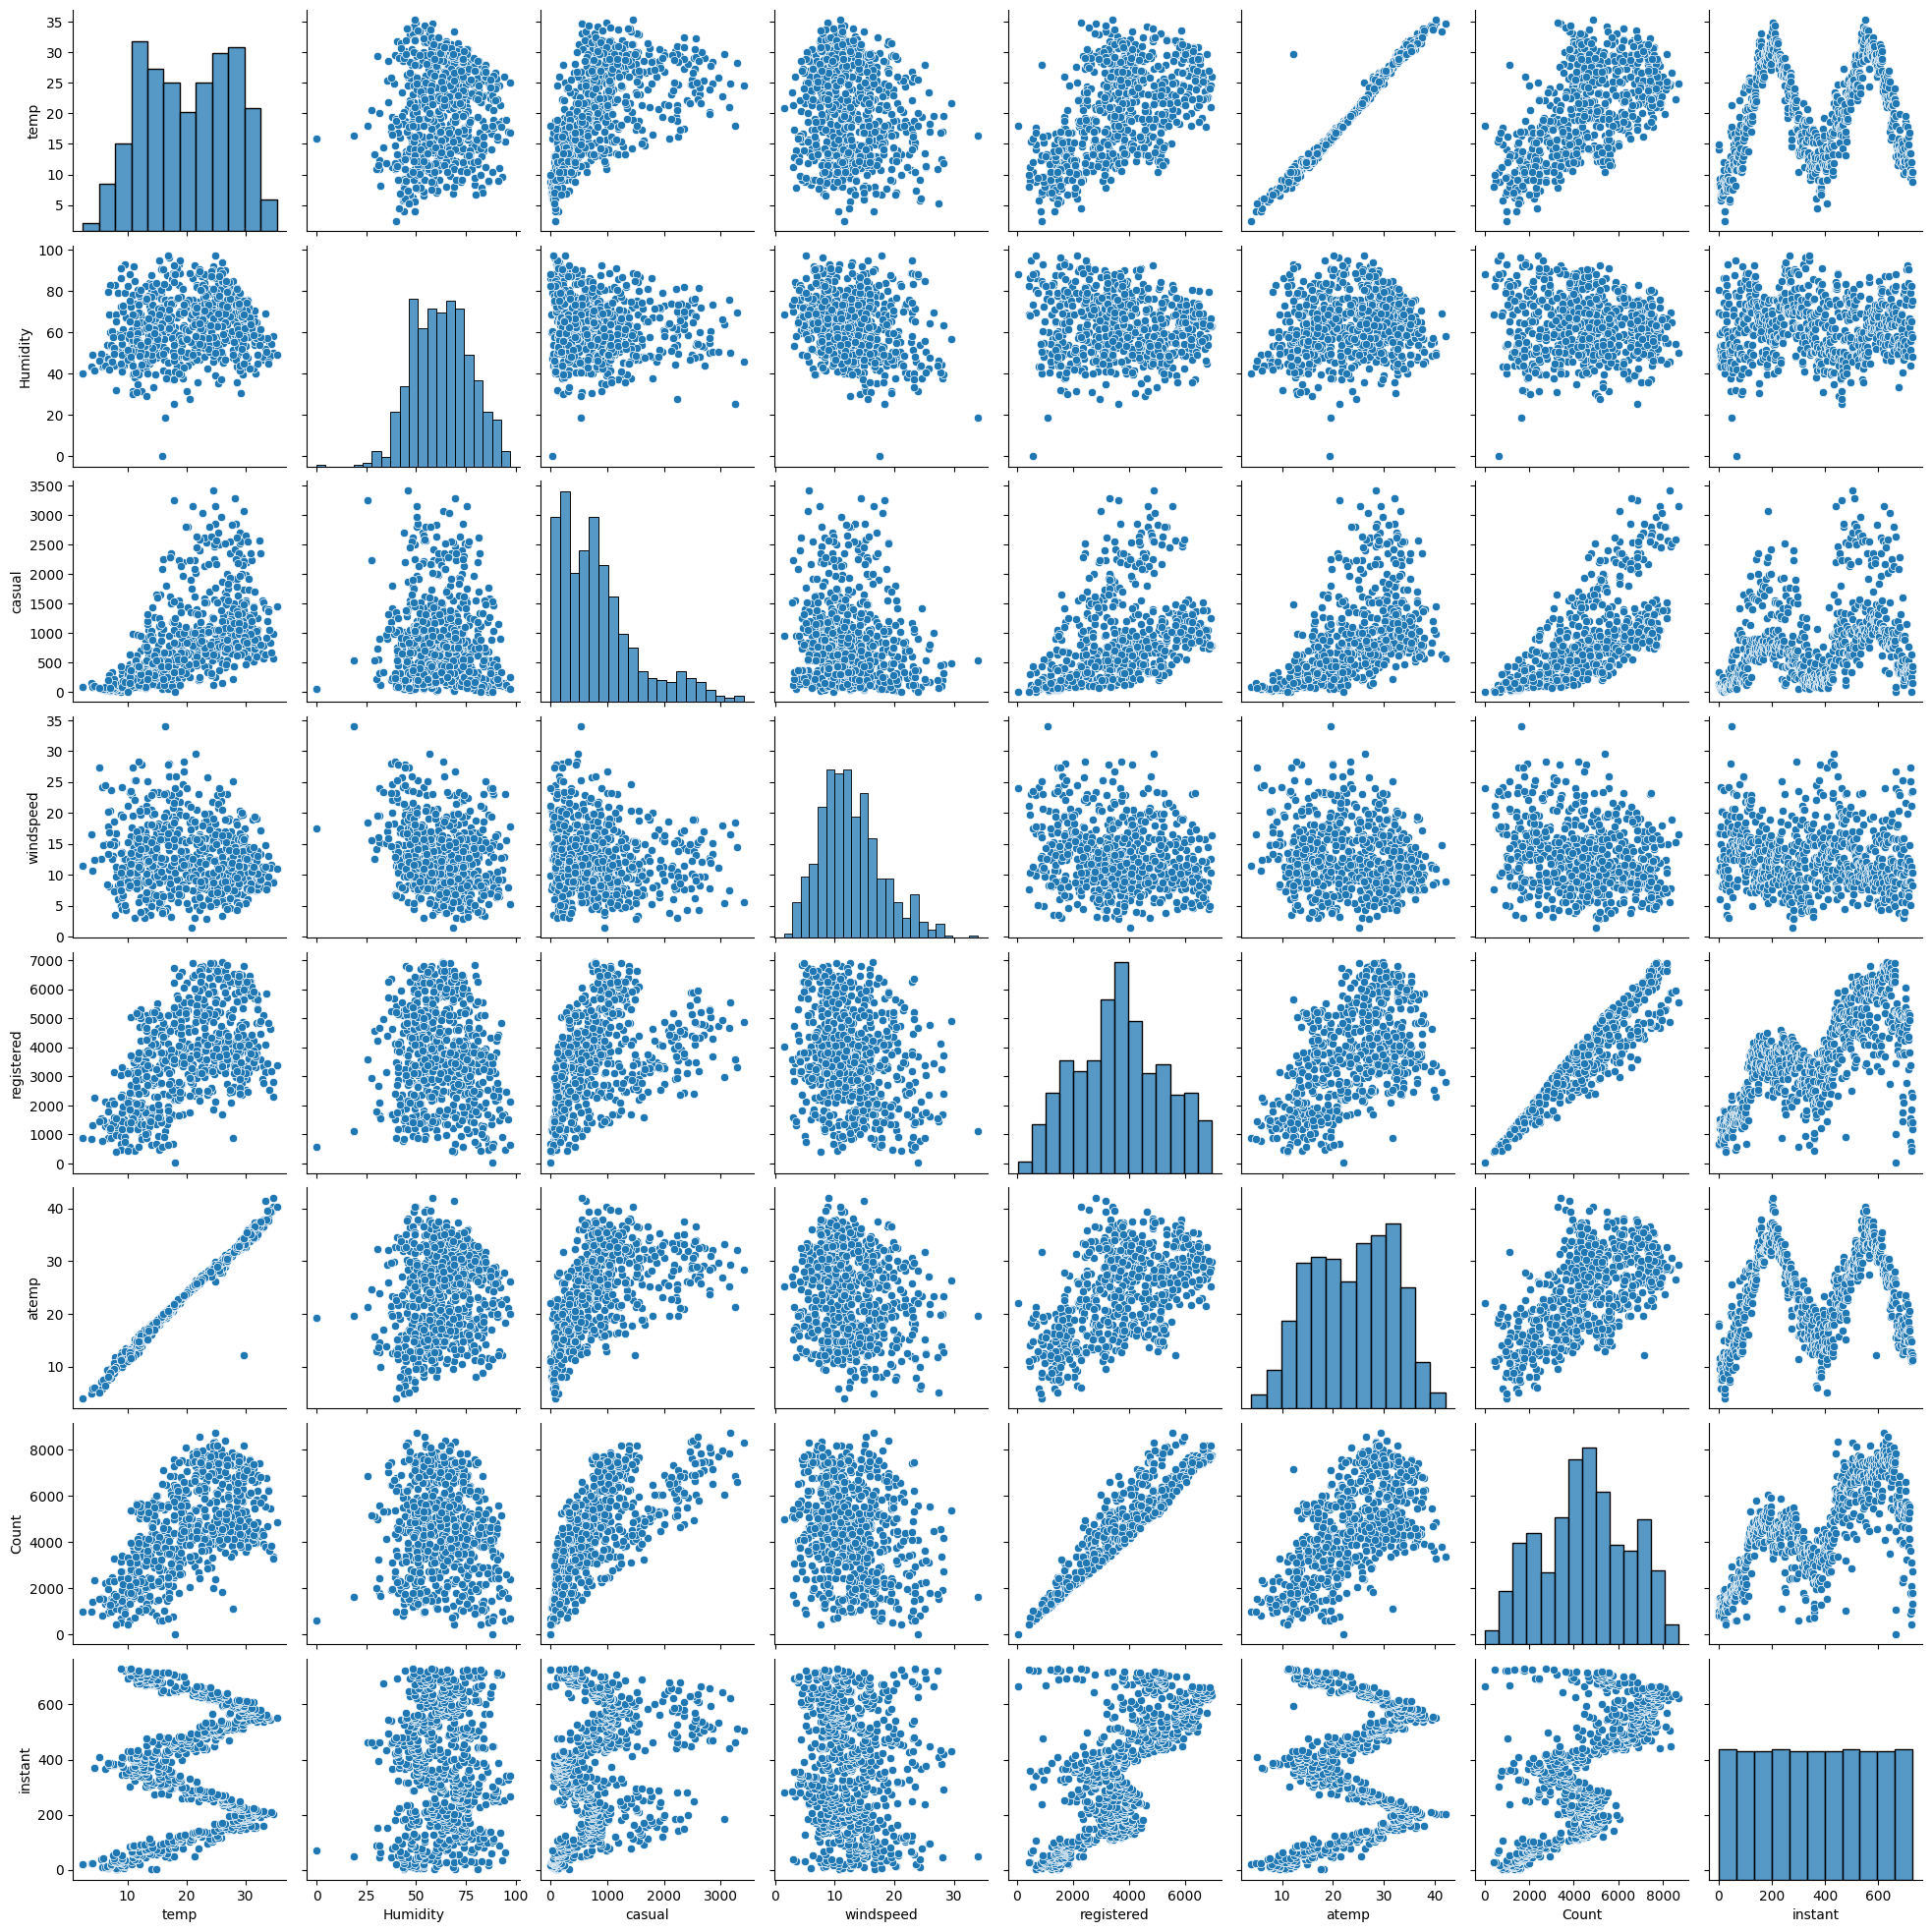

In [91]:
sns.pairplot(bike, vars=["temp", "Humidity",'casual','windspeed','registered','atemp','Count','instant'])
plt.show()

#### We can see that there are some independent variables look positively correlated to the 'count' variable. 
-  Bike rentals are more correlated to temperature


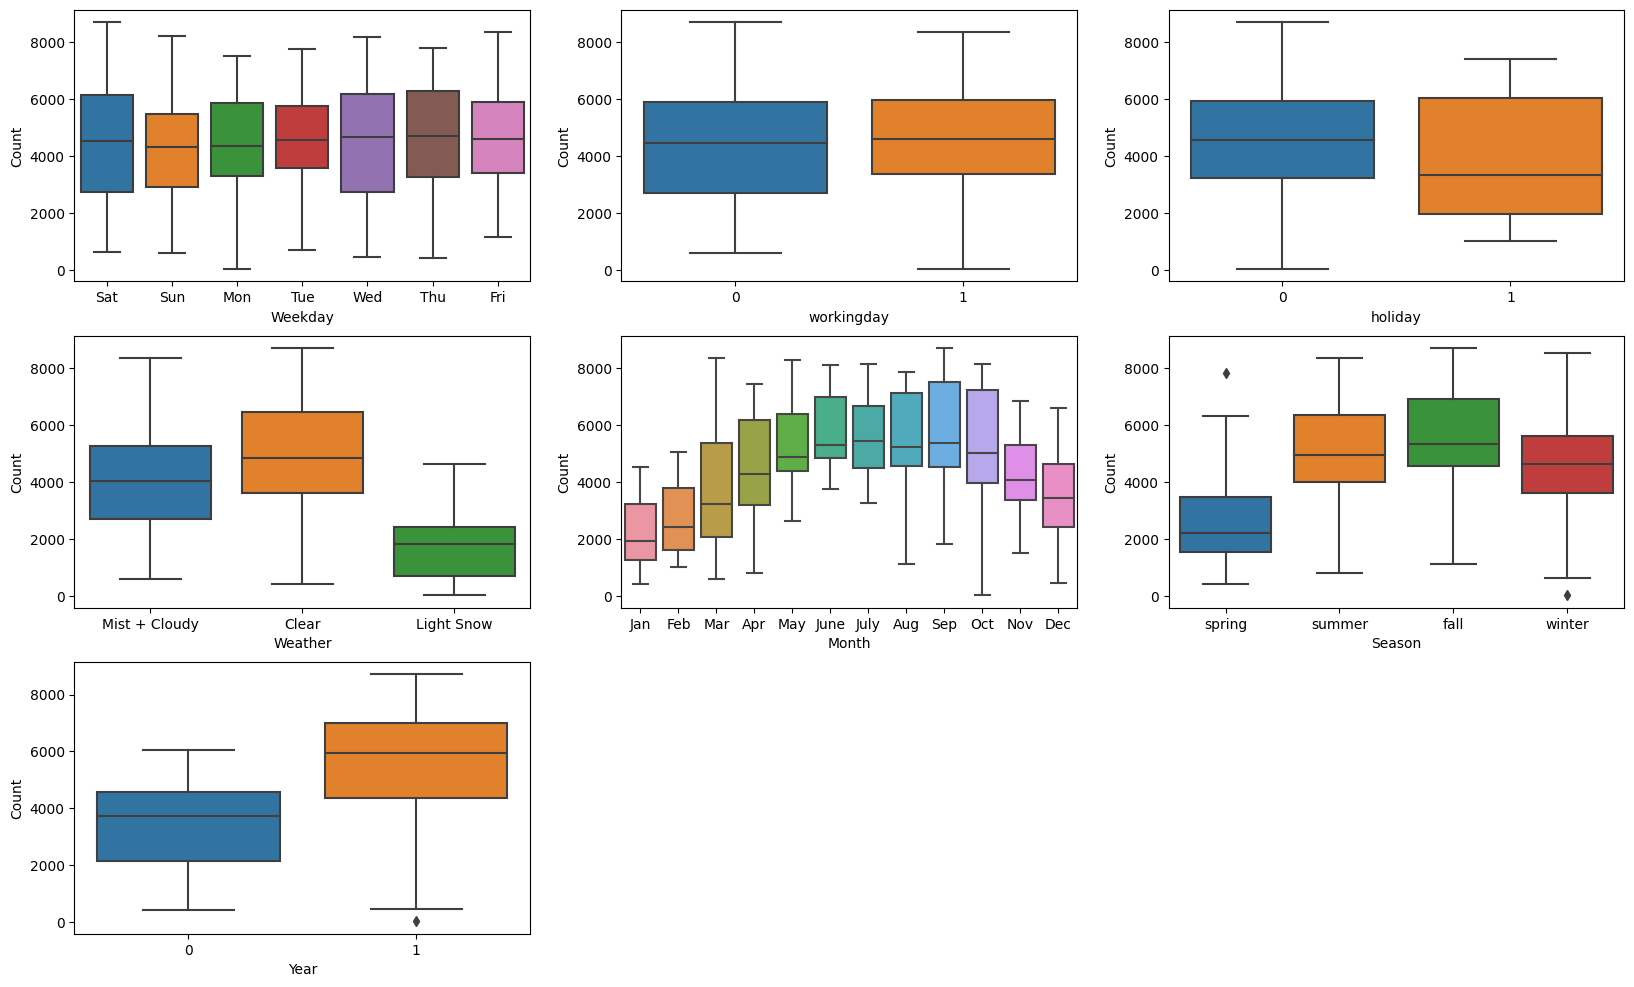

In [92]:
## Visualising category Variable,
# Relationsip between Category Variable and Continous Variable

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'Weekday', y = 'Count', data = bike)


plt.subplot(3,3,2)
sns.boxplot(x = 'workingday', y = 'Count', data = bike)


plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'Count', data = bike)

plt.subplot(3,3,4)
sns.boxplot(x = 'Weather', y = 'Count', data = bike)

plt.subplot(3,3,5)
sns.boxplot(x = 'Month', y = 'Count', data = bike)


plt.subplot(3,3,6)
sns.boxplot(x = 'Season', y = 'Count', data = bike)

plt.subplot(3,3,7)
sns.boxplot(x = 'Year', y = 'Count', data = bike)

plt.show()


### Insights show the relationship
- Bike Rentals are more :
    - Saturday and Wednesday has
    - Off day
    - Clear Weather
    - Summary and fall

In [93]:
### Univariate Analysis

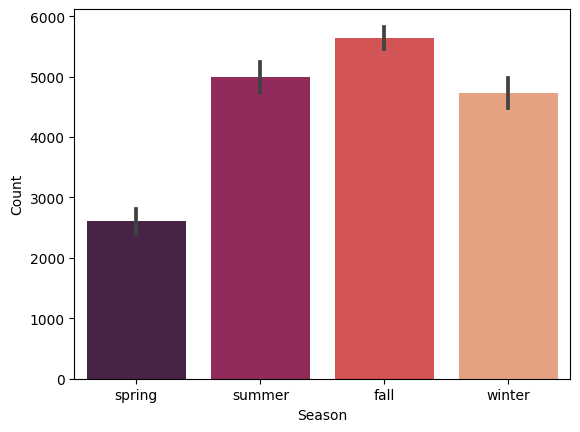

In [94]:
# Between season and count of bike rentals

sns.barplot('Season','Count',data=bike,palette="rocket",)
plt.show()
#Bike Rental and higer in Summar and fall

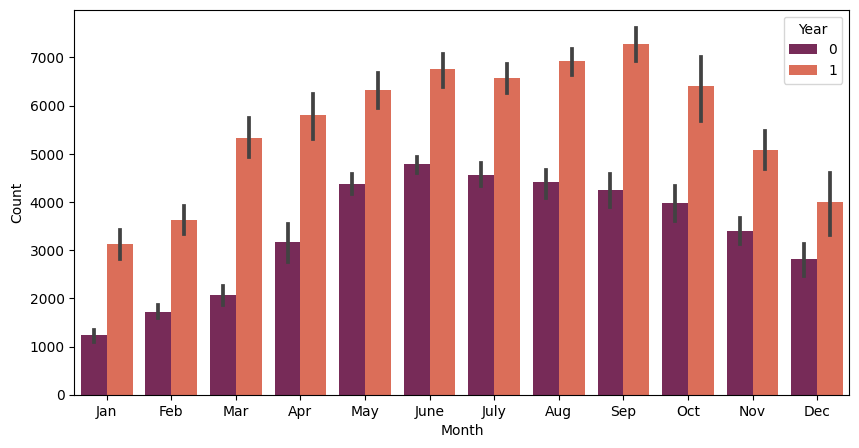

In [95]:
#Relation between month and  count
plt.figure(figsize=(10,5))
sns.barplot('Month','Count',hue='Year',data=bike,palette='rocket')
plt.show()

- Bike Rentals are more in the year 2019 compared to 2018

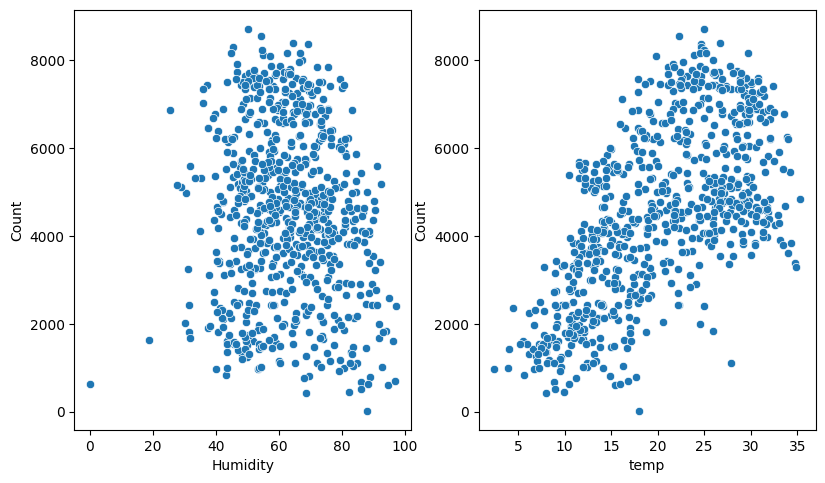

In [96]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.scatterplot(x='Humidity', y='Count',data=bike)
plt.subplot(2,4,2)
sns.scatterplot(x='temp',y='Count' ,data=bike)
plt.show()

- Rentals are higher when temprature is more than 50 and humidity doesn't give significant 

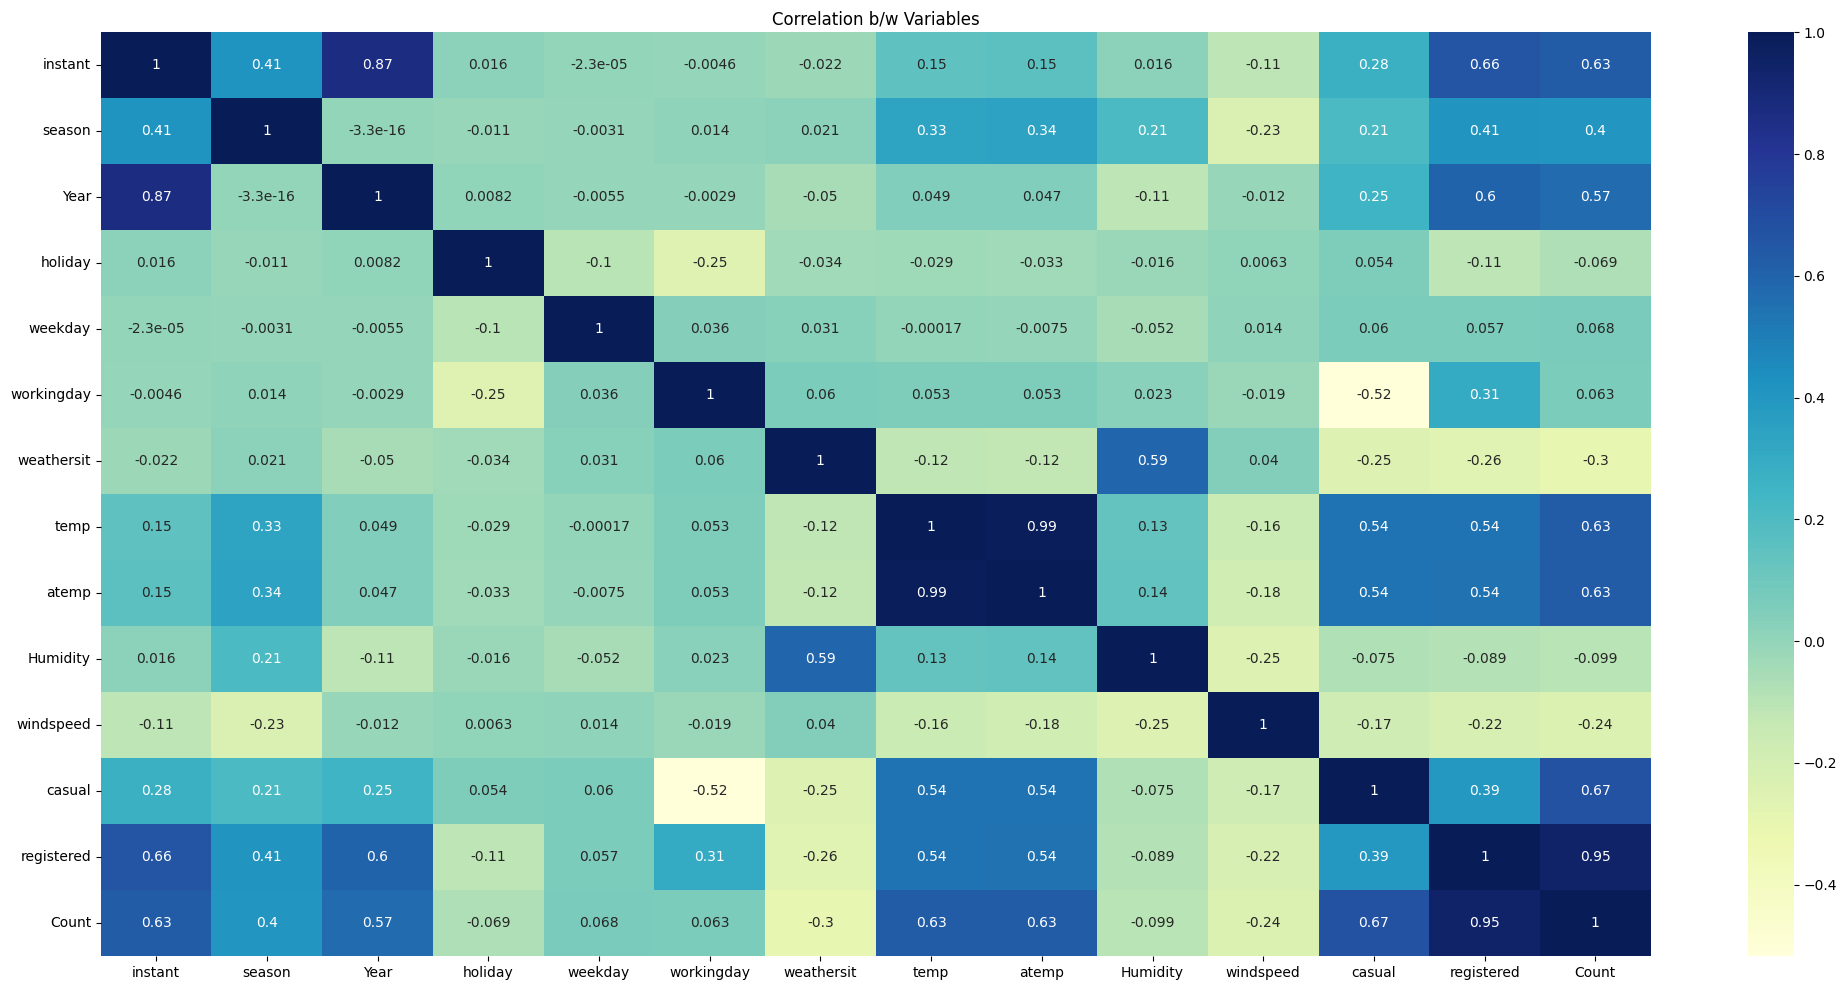

In [97]:
#Heatmap correlation between variables
plt.figure(figsize=(25, 12))
sns.heatmap(bike.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation b/w Variables")
plt.show()

We can observe registered, casual, temp, atemp, season and instant variables are corelated tiwth count.
Good case to go with Linear Regression Model for prediction

In [105]:
bike

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,1,2,3,4,5,6,2,3,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,1,2,3,4,5,6,2,3,spring,summer,winter,instant,dteday,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,casual,registered,Count,Season,Weather,Weekday
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,01-01-2018,1,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,spring,Mist + Cloudy,Sat
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,2,02-01-2018,1,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,spring,Mist + Cloudy,Sun
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,3,03-01-2018,1,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,spring,Clear,Mon
3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,4,04-01-2018,1,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,spring,Clear,Tue
4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,5,05-01-2018,1,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,spring,Clear,Wed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,726,27-12-2019,1,1,Dec,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114,spring,Mist + Cloudy,Thu
726,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,727,28-12-2019,1,1,Dec,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095,spring,Mist + Cloudy,Fri
727,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,728,29-12-2019,1,1,Dec,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341,spring,Mist + Cloudy,Sat
728,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,729,30-12-2019,1,1,Dec,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796,spring,Clear,Sun


In [106]:
##Splitting Data into Testing dataset and Training Data Set

months=pd.get_dummies(bike.Month,drop_first=True)
weekdays=pd.get_dummies(bike.weekday,drop_first=True)
weather_sit=pd.get_dummies(bike.weathersit,drop_first=True)
seasons=pd.get_dummies(bike.Season,drop_first=True)
bike=pd.concat([months,weekdays,weather_sit,seasons,bike],axis=1)
bike.drop(['dteday','Season','Month','Weekday','Weather'], axis = 1, inplace = True)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,1,2,3,4,5,6,2,3,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,1,2,3,4,5,6,2,3,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,1,2,3,4,5,6,2,3,spring,summer,winter,instant,season,Year,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,casual,registered,Count
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,2,1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,3,1,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,4,1,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,5,1,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [172]:
from sklearn.model_selection import train_test_split


bikeTrainingDS, bikeTestDs = train_test_split(bike, train_size = 0.8, random_state = 100)

print("bikeTrainingDS.shape {} and bikeTestDs.shape : {}".format(bikeTrainingDS.shape,bikeTestDs.shape))

bikeTrainingDS.shape (584, 80) and bikeTestDs.shape : (146, 80)


In [173]:
# Lets Scale the model

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

numVars=["Count",'temp','Humidity','windspeed']

bikeTrainingDS[numVars] = scale.fit_transform(bikeTrainingDS[numVars])
bikeTrainingDS.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,1,2,3,4,5,6,2,3,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,1,2,3,4,5,6,2,3,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,1,2,3,4,5,6,2,3,spring,summer,winter,instant,season,Year,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,casual,registered,Count
367,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,368,1,1,0,2,1,1,0.113228,6.31375,0.454701,0.695175,89,2147,0.254717
648,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,649,4,1,0,4,1,1,0.468352,21.55835,0.477458,0.299450,834,6736,0.868385
44,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,45,1,0,0,1,1,1,0.443431,19.91750,0.387290,0.807474,208,1705,0.217556
705,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,706,4,1,0,5,1,2,0.326094,16.09790,0.787463,0.189819,349,4659,0.573631
379,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,380,1,1,0,0,0,1,0.133996,8.08125,0.431945,0.449210,284,2027,0.263346


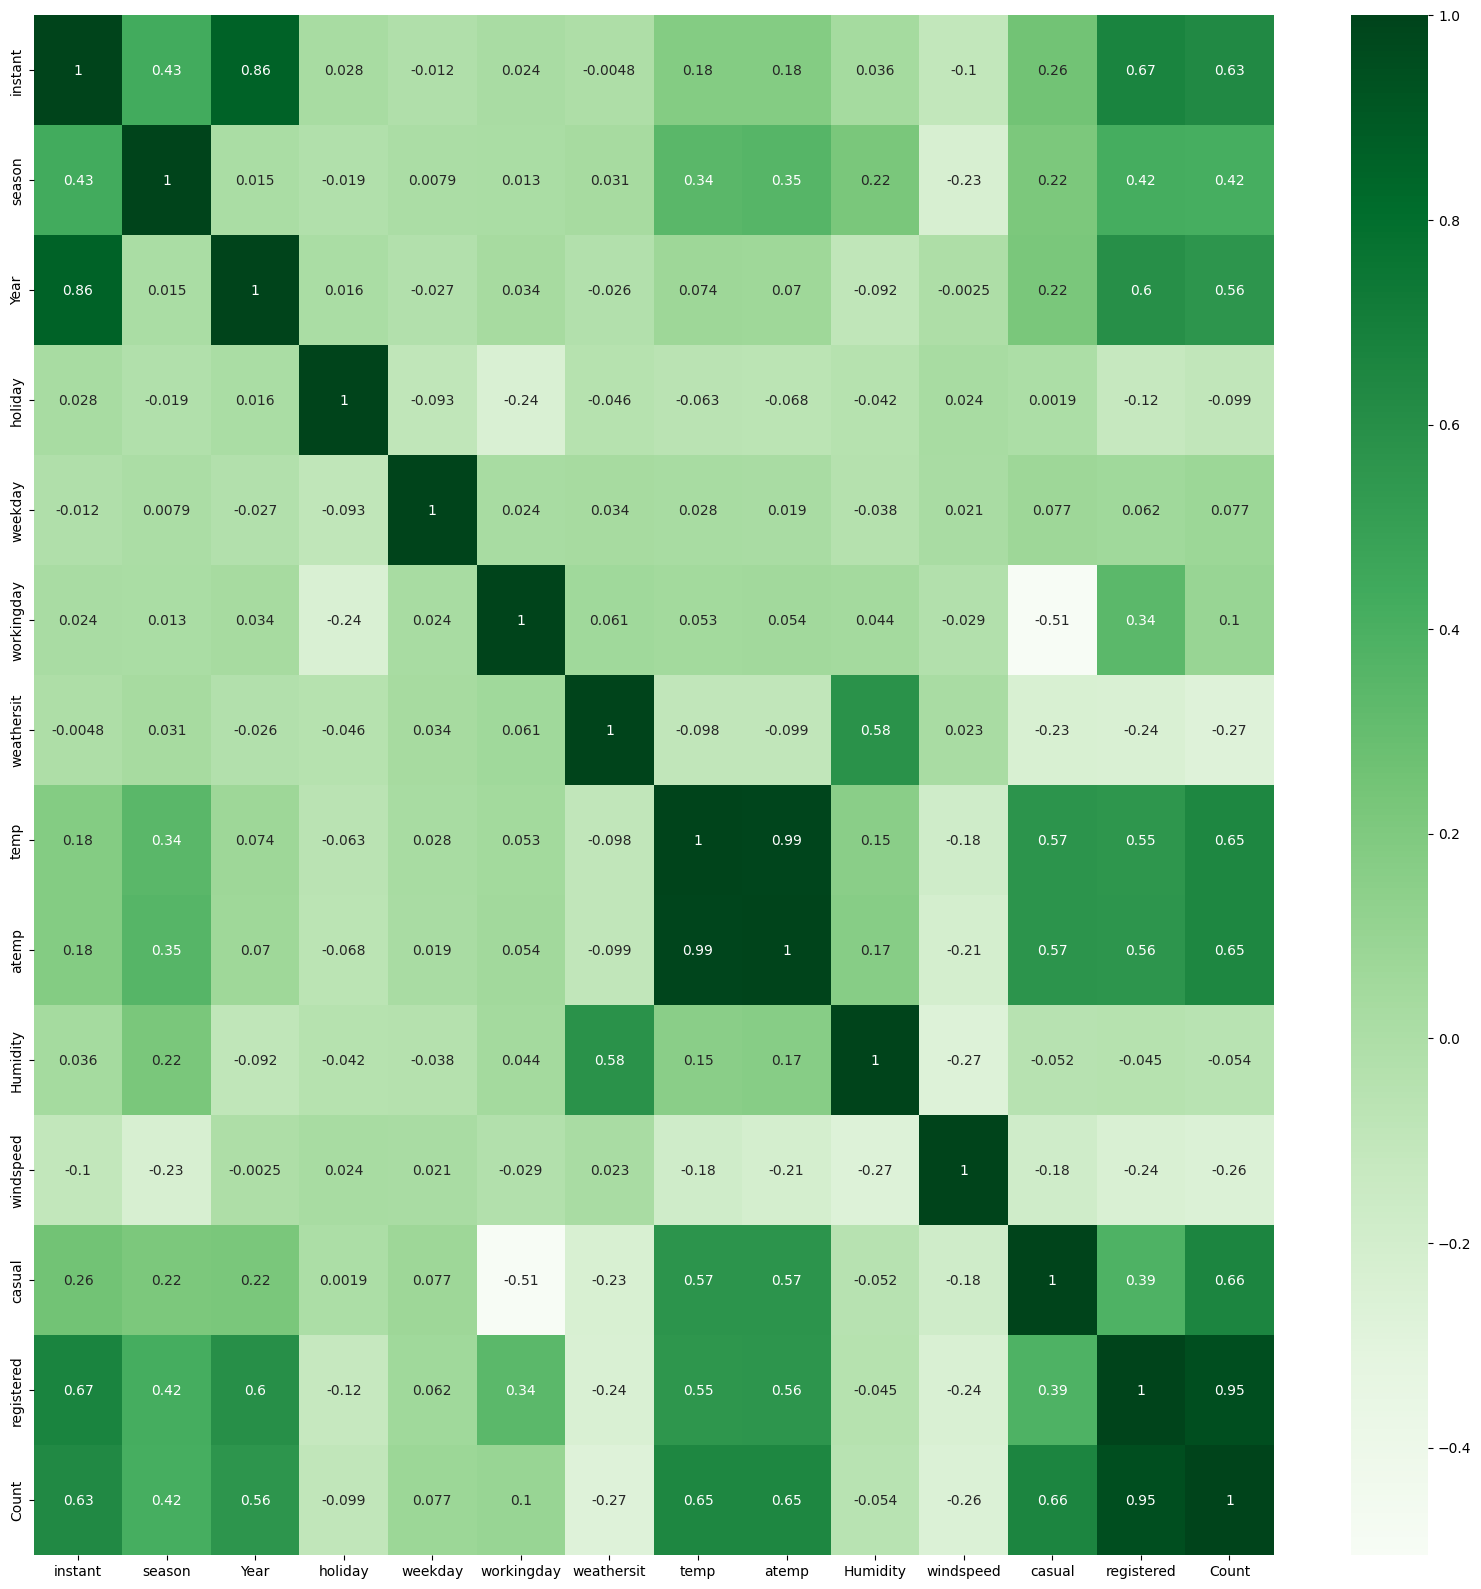

In [61]:
# Checking Corelation

plt.figure(figsize=(20, 20))
sns.heatmap(bikeTrainingDS.corr(),cmap='Greens',annot = True)
plt.show()

In [109]:
### Building Linear Model
# bikeTrainingDS.drop(["dteday","Month","Weather","Season","Weekday","instant"],axis=1,inplace=True)

In [110]:
bikeTrainingDS

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,1,2,3,4,5,6,2,3,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,1,2,3,4,5,6,2,3,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,1,2,3,4,5,6,2,3,spring,summer,winter,instant,season,Year,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,casual,registered,Count
367,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,368,1,1,0,2,1,1,0.113228,6.31375,0.454701,0.695175,89,2147,0.254717
648,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,649,4,1,0,4,1,1,0.468352,21.55835,0.477458,0.299450,834,6736,0.868385
44,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,45,1,0,0,1,1,1,0.443431,19.91750,0.387290,0.807474,208,1705,0.217556
705,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,706,4,1,0,5,1,2,0.326094,16.09790,0.787463,0.189819,349,4659,0.573631
379,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,380,1,1,0,0,0,1,0.133996,8.08125,0.431945,0.449210,284,2027,0.263346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,579,3,1,0,4,1,1,0.863973,35.35440,0.679690,0.187140,983,6278,0.832835
53,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,54,1,0,0,3,1,1,0.202618,12.28585,0.435939,0.111379,139,1778,0.218017
350,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,351,4,0,0,6,0,2,0.248216,12.46855,0.577930,0.431816,275,2464,0.312586
79,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,80,2,0,0,1,1,2,0.462664,20.48675,0.759870,0.529881,401,1676,0.236424


In [111]:
YTrain = bikeTrainingDS.pop('Count')
XTrain = bikeTrainingDS

In [112]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [113]:
lr = LinearRegression()
lr.fit(XTrain, YTrain)

rfe = RFE(lr)           
rfe = rfe.fit(XTrain, YTrain)

In [114]:
rfe

RFE(estimator=LinearRegression())

In [115]:
list(zip(XTrain.columns,rfe.support_,rfe.ranking_))
XTrain.columns[rfe.support_]

Index([       'Dec',        'Feb',        'Jan',       'June',        'Oct',
                  2,            3,     'spring',     'winter',        'Aug',
              'Dec',        'Feb',        'Jan',        'Mar',        'Sep',
                  2,     'spring',     'summer',     'winter',        'Aug',
              'Dec',        'Feb',       'July',        'Mar',        'May',
              'Nov',        'Oct',        'Sep',            6,            3,
           'spring',     'summer',     'winter',    'holiday',       'temp',
         'Humidity',  'windspeed',     'casual', 'registered'],
      dtype='object')

In [116]:
col = XTrain.columns[rfe.support_]
XTrainRfe = XTrain[col]
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(XTrainRfe)
#Running
lm = sm.OLS(YTrain,XTrainRfe).fit()


In [117]:
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Count   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.488e+08
Date:                Sat, 02 Jul 2022   Prob (F-statistic):                        0.00
Time:                        21:44:35   Log-Likelihood:                          4094.7
No. Observations:                 584   AIC:                                     -8139.
Df Residuals:                     559   BIC:                                     -8030.
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [118]:
## Testing Parametrs to test  our model, using Variance Inflation Factor

In [145]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = XTrainRfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Dec,inf
56,2,inf
82,May,inf
81,May,inf
80,Mar,inf
...,...,...
113,Humidity,38.18
116,registered,12.83
115,casual,6.66
114,windspeed,5.23


In [141]:
XTrainRfe.head()

,Dec,Dec,Dec,Feb,Feb,Feb,Jan,Jan,Jan,June,June,June,Oct,Oct,Oct,2,2,2,2,2,2,3,3,3,3,3,3,spring,spring,spring,winter,winter,winter,Aug,Aug,Aug,Dec,Dec,Dec,Feb,Feb,Feb,Jan,Jan,Jan,Mar,Mar,Mar,Sep,Sep,Sep,2,2,2,2,2,2,spring,spring,spring,summer,summer,summer,winter,winter,winter,Aug,Aug,Aug,Dec,Dec,Dec,Feb,Feb,Feb,July,July,July,Mar,Mar,Mar,May,May,May,Nov,Nov,Nov,Oct,Oct,Oct,Sep,Sep,Sep,6,6,6,3,3,3,3,3,3,spring,spring,spring,summer,summer,summer,winter,winter,winter,holiday,temp,Humidity,windspeed,casual,registered
367,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0.113228,0.454701,0.695175,89,2147
648,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0.468352,0.477458,0.299450,834,6736
44,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0.443431,0.387290,0.807474,208,1705
705,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0.326094,0.787463,0.189819,349,4659
379,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0.133996,0.431945,0.449210,284,2027


In [139]:
XTrainLm1 = sm.add_constant(XTrain1)
lm1 = sm.OLS(y_train,XTrainLm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.221e+30
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:33:36   Log-Likelihood:                 19909.
No. Observations:                 584   AIC:                        -3.977e+04
Df Residuals:                     559   BIC:                        -3.966e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0025   1.67e-16  -1.51e+13      0.0

In [146]:
XTrainLm2 = XTrainRfe.drop(["Humidity","holiday","windspeed","July"], axis = 1)
XTrainLm2 = sm.add_constant(XTrainLm1)
lm2 = sm.OLS(y_train,XTrainLm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.221e+30
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:19:13   Log-Likelihood:                 19909.
No. Observations:                 584   AIC:                        -3.977e+04
Df Residuals:                     559   BIC:                        -3.966e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0025   1.67e-16  -1.51e+13      0.0

In [ ]:
## analysis
- removed columns "Humidity","holiday","windspeed","July" to get the accurate model


In [166]:
#lets continue with this model

yTrainPred = lm2.predict(XTrainLm2)

yTrainPred


367    0.254717
648    0.868385
44     0.217556
705    0.573631
379    0.263346
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Length: 584, dtype: float64

In [158]:
residual=y_train - yTrainCount
residual

367    6.661338e-16
648    0.000000e+00
44     4.718448e-16
705   -3.330669e-16
379    3.885781e-16
           ...     
578    1.110223e-16
53     5.273559e-16
350   -2.220446e-16
79    -2.775558e-16
520    1.110223e-16
Length: 584, dtype: float64

Text(0.5, 0, 'Errors')

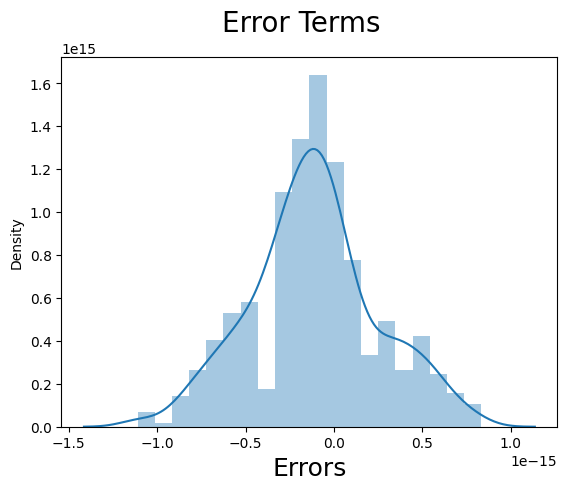

In [151]:
fig = plt.figure()
sns.distplot((residual), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)     

In [174]:
YTest = bikeTrainingDS.pop('Count')
XTest = bikeTrainingDS
XTest.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,1,2,3,4,5,6,2,3,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,1,2,3,4,5,6,2,3,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,1,2,3,4,5,6,2,3,spring,summer,winter,instant,season,Year,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,casual,registered
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.090753,0.087329,0.073630,0.087329,0.075342,0.077055,0.090753,0.087329,0.080479,0.092466,0.080479,0.148973,0.133562,0.154110,0.135274,0.123288,0.150685,0.342466,0.027397,0.251712,0.246575,0.250000,0.090753,0.087329,0.073630,0.087329,0.075342,0.077055,0.090753,0.087329,0.080479,0.092466,0.080479,0.148973,0.133562,0.154110,0.135274,0.123288,0.150685,0.342466,0.027397,0.251712,0.246575,0.250000,0.090753,0.087329,0.073630,0.087329,0.075342,0.077055,0.090753,0.087329,0.080479,0.092466,0.080479,0.148973,0.133562,0.154110,0.135274,0.123288,0.150685,0.342466,0.027397,0.251712,0.246575,0.250000,370.976027,2.500000,0.513699,0.027397,2.940068,0.667808,1.397260,0.537414,23.500998,0.649499,0.319463,846.921233,3658.345890
std,0.287504,0.282558,0.261392,0.282558,0.264169,0.266907,0.287504,0.282558,0.272267,0.289931,0.272267,0.356367,0.340472,0.361363,0.342309,0.329049,0.358048,0.474941,0.163378,0.434369,0.431387,0.433384,0.287504,0.282558,0.261392,0.282558,0.264169,0.266907,0.287504,0.282558,0.272267,0.289931,0.272267,0.356367,0.340472,0.361363,0.342309,0.329049,0.358048,0.474941,0.163378,0.434369,0.431387,0.433384,0.287504,0.282558,0.261392,0.282558,0.264169,0.266907,0.287504,0.282558,0.272267,0.289931,0.272267,0.356367,0.340472,0.361363,0.342309,0.329049,0.358048,0.474941,0.163378,0.434369,0.431387,0.433384,211.362563,1.120524,0.500241,0.163378,2.025948,0.471403,0.542903,0.225336,8.062524,0.144219,0.168114,674.497224,1595.372309
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.953480,0.000000,0.000000,2.000000,20.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,187.75000

In [175]:
# R Square and Adjusted R Square for test Set
from sklearn.metrics import r2_score
r2_score(YTest,yTrainPred)

Adj_r2=1-(1-0.8115083)*(11-1)/(11-1-1)
print(Adj_r2)

0.7905647777777778


Text(0, 0.5, 'yTrainPred')

<Figure size 640x480 with 0 Axes>

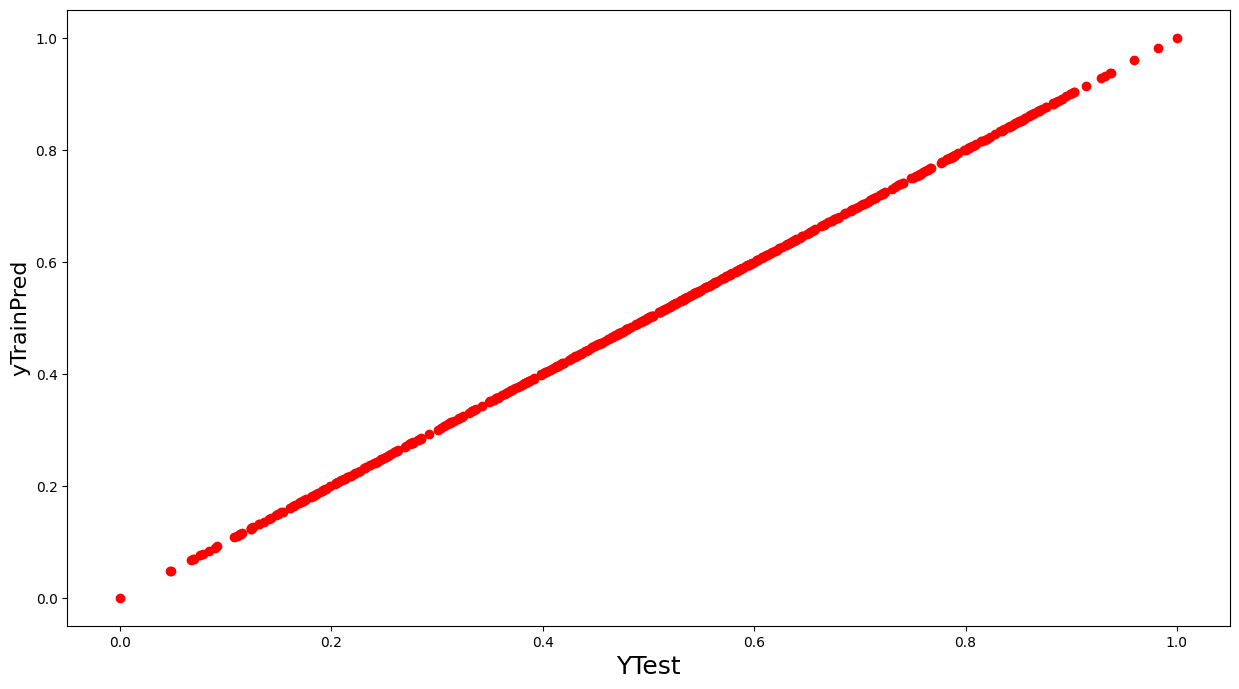

In [176]:
# odel Evalution

# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(YTest,yTrainPred,color='Red')
fig.suptitle('YTest vs yTrainPred', fontsize=20)              # Plot heading 
plt.xlabel('YTest', fontsize=18)                          # X-label
plt.ylabel('yTrainPred', fontsize=16)    

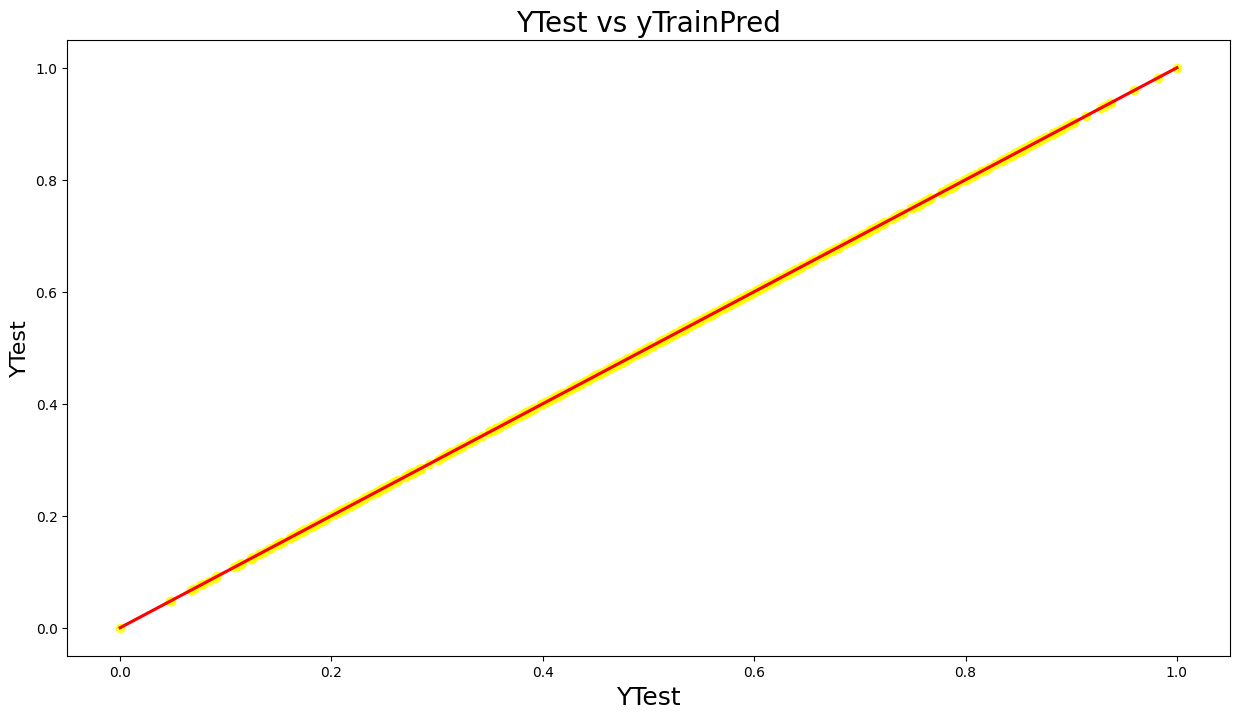

In [179]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=YTest, y=YTest, ci=68, fit_reg=True,scatter_kws={"color": "yellow"}, line_kws={"color": "red"})

plt.title('YTest vs yTrainPred', fontsize=20)              # Plot heading 
plt.xlabel('YTest', fontsize=18)                          # X-label
plt.ylabel('YTest', fontsize=16)                          # Y-label
plt.show()

## Assignment-based Subjective Questions
##### 1. From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable? (3 marks)
Answer : Dependent varilable descres whenever independependent variable increases
##### 2. Why is it important to use drop_first=True during dummy variable creation? (2 mark)
Answer : It helps to reducing the extra column created during the dummy variable creation
##### 3. Looking at the pair-plot among the numerical variables, which one has the highest correlation with the target variable? (1 mark)
Answer : Seasion
##### 4. How did you validate the assumptions of Linear Regression after building the model on the training set? (3 marks)
Answer : Pair-wise scatterplots may be helpful in validating the linearity assumption as it is easy to visualize a linear relationship on a plot.
##### 5. Based on the final model, which are the top 3 features contributing significantly towards explaining the demand of the shared bikes? (2 marks)
Answer : Seasion, Weather, Year, Temp